In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mping.imread(target_folder + "/"  + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


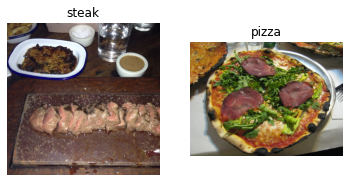

In [17]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,                  # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,            # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),    # 처리할 이미지의 크기를 224 X 224fh whwjd
    class_mode = 'binary',
    seed = 42
    )

valid_data = valid_datagen.flow_from_directory(
    train_dir,                  # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,            # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),    # 처리할 이미지의 크기를 224 X 224fh whwjd
    class_mode = 'binary',
    seed = 42
    )


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [11]:
images, labels = train_data.next()


In [12]:
len(images), len(labels)

(30, 30)

In [13]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [14]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [15]:
model_4 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        strides = 1,
        padding = "valid",
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [16]:
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [17]:
history_4 = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 67s 1s/step - loss: 0.8625 - accuracy: 0.5320 - val_loss: 0.6399 - val_accuracy: 0.6793
Epoch 2/5
50/50 [==============================] - 72s 1s/step - loss: 0.5265 - accuracy: 0.7507 - val_loss: 0.3817 - val_accuracy: 0.8260
Epoch 3/5
50/50 [==============================] - 73s 1s/step - loss: 0.4027 - accuracy: 0.8327 - val_loss: 0.3693 - val_accuracy: 0.8533
Epoch 4/5
50/50 [==============================] - 81s 2s/step - loss: 0.3353 - accuracy: 0.8653 - val_loss: 0.2347 - val_accuracy: 0.9240
Epoch 5/5
50/50 [==============================] - 119s 2s/step - loss: 0.2442 - accuracy: 0.9013 - val_loss: 0.1541 - val_accuracy: 0.9540


In [18]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

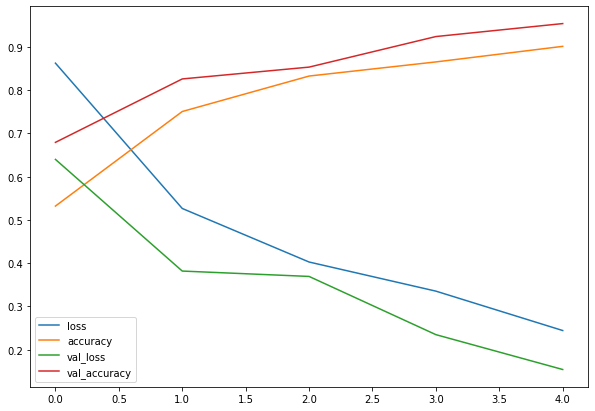

In [19]:
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [23]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

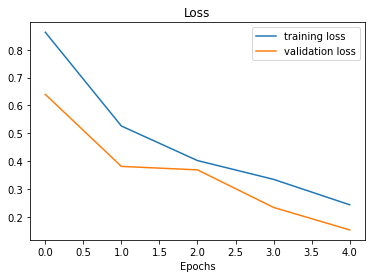

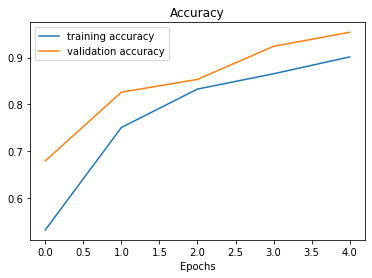

In [24]:
plot_loss_curves(history_4)

In [26]:
model_5 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_5 = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 36s 716ms/step - loss: 0.5869 - accuracy: 0.6853 - val_loss: 0.5079 - val_accuracy: 0.7707
Epoch 2/5
50/50 [==============================] - 35s 702ms/step - loss: 0.4535 - accuracy: 0.7980 - val_loss: 0.4616 - val_accuracy: 0.7987
Epoch 3/5
50/50 [==============================] - 44s 890ms/step - loss: 0.4198 - accuracy: 0.8100 - val_loss: 0.3784 - val_accuracy: 0.8473
Epoch 4/5
50/50 [==============================] - 47s 935ms/step - loss: 0.4110 - accuracy: 0.8220 - val_loss: 0.3619 - val_accuracy: 0.8533
Epoch 5/5
50/50 [==============================] - 52s 1s/step - loss: 0.3705 - accuracy: 0.8373 - val_loss: 0.3455 - val_accuracy: 0.8713


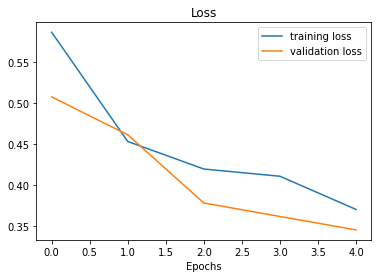

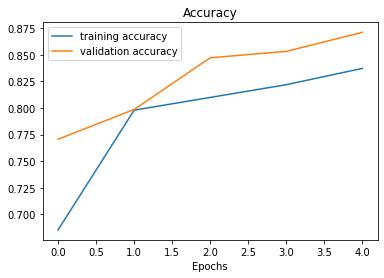

In [27]:
plot_loss_curves(history_5)

In [28]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

## Data Augmentation
- 모델 과적합을 방지하고자 하는 방법. 
    - 모델이 과적합 되는 경우, 유효성 검사 손실(validation loss)이 계속 증가하는 경우, data Augmentation을 사용해본다.
    - 데이터를 얼마나 늘릴 것인지는 정해진 것이 없다.

In [18]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
    )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 30,
    class_mode= "binary",
    shuffle = False
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size= (244, 244),
    batch_size= 30,
    class_mode= "binary",
    shuffle = False
)


test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size= (244, 244),
    batch_size= 30,
    class_mode= "binary",
    shuffle = False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
images, lables = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 243.5, 243.5, -0.5)

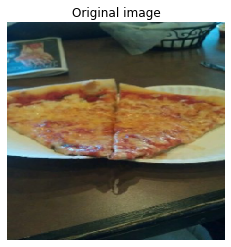

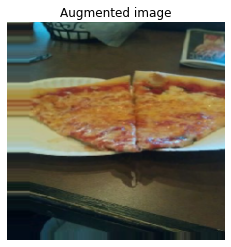

In [31]:
random_number = random.randint(0, 30)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [32]:
model_6 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5


InvalidArgumentError:  Input to reshape is a tensor with 235200 values, but the requested shape requires a multiple of 6760
	 [[node sequential_3/flatten_3/Reshape (defined at <ipython-input-32-2ac0ebdd6e32>:25) ]] [Op:__inference_train_function_3904]

Function call stack:
train_function
